In [1]:
# data analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

## Machine learning libraries
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV

In [12]:
dataset = pd.read_csv('F:/python/titanic_data.csv')
data = dataset.iloc[:,0:8]

In [23]:
data.head(7)

,Pclass,Sex,Age,SibSp,Parch,logFare,Embarked,live
0,3,male,22.0,1,0,0.860338007,S,0
1,1,female,38.0,1,0,1.852987797,C,1
2,3,female,26.0,0,0,0.898999271,S,1
3,1,female,35.0,1,0,1.725094521,S,1
4,3,male,35.0,0,0,0.90579588,S,0
5,3,male,NaN,0,0,0.927283085,Q,0
6,1,male,54.0,0,0,1.714853448,S,0


In [43]:
data[178:181]

,Pclass,Sex,Age,SibSp,Parch,logFare,Embarked,live
178,2,male,30.0,0,0,1.113943352,S,0
179,3,male,36.0,0,0,NaN,S,0
180,3,female,NaN,8,2,1.842297134,S,0


In [ ]:
data.logFare.replace(['#NUM!'],[np.NAN],inplace=True)  #将#NUM!替换为np.NAN

In [44]:
## get dummy variables for Column sex and embarked since they are categorical value
data = pd.get_dummies(data, columns=['Sex'],drop_first=True)
data = pd.get_dummies(data, columns=['Embarked'],drop_first=False)

In [48]:
data.head(2)

,Pclass,Age,SibSp,Parch,logFare,live,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0.860338007,0,1,0,0,1
1,1,38.0,1,0,1.852987797,1,0,1,0,0


In [50]:
## Renaming the Sex_male column to Gender, since this will be quite important part of this notebook later on. 
data = data.rename(columns={'Sex_male':'Gender'})
data.head(2)


,Pclass,Age,SibSp,Parch,logFare,live,Gender,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0.860338007,0,1,0,0,1
1,1,38.0,1,0,1.852987797,1,0,1,0,0


In [51]:
# Check to see if there are any missing values, 
# It looks like the Cabin column will not be much of help for the dataset
data.isnull().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
logFare        15
live            0
Gender          0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [46]:
data.dtypes

Pclass          int64
Age           float64
SibSp           int64
Parch           int64
logFare        object
live            int64
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [47]:
# importing KNN to help fill up the missing values for age column.
from sklearn.neighbors import NearestNeighbors
age_filled_data = NearestNeighbors(n_neighbors=10).fit(data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [63]:
#将data中的空值设置为0
data.replace([np.NAN],[0],inplace=True)
data[5:8]

,Pclass,Age,SibSp,Parch,logFare,live,Gender,Embarked_C,Embarked_Q,Embarked_S
5,3,0.0,0,0,0.927283085,0,1,0,1,0
6,1,54.0,0,0,1.714853448,0,1,0,0,1
7,3,2.0,3,1,1.323767583,0,1,0,0,1


In [64]:
data.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
logFare       0
live          0
Gender        0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [66]:
df = data
df.head(2)

,Pclass,Age,SibSp,Parch,logFare,live,Gender,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0.860338007,0,1,0,0,1
1,1,38.0,1,0,1.852987797,1,0,1,0,0


In [67]:
df.shape

(891, 10)

In [68]:
df.live.value_counts()/len(df)

0    0.616162
1    0.383838
Name: live, dtype: float64

In [69]:
df.describe()

,Pclass,Age,SibSp,Parch,live,Gender,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,23.799293,0.523008,0.381594,0.383838,0.647587,0.188552,0.086420,0.722783
std,0.836071,17.596074,1.102743,0.806057,0.486592,0.477990,0.391372,0.281141,0.447876
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
# Overview(Survived vs non survied)
live_summary = df.groupby('live')
live_summary.mean()

,Pclass,Age,SibSp,Parch,Gender,Embarked_C,Embarked_Q,Embarked_S
live,,,,,,,,
0,2.531876,23.653005,0.553734,0.329690,0.852459,0.136612,0.085610,0.777778
1,1.950292,24.034123,0.473684,0.464912,0.318713,0.271930,0.087719,0.634503


In [72]:
?df.groupby

In [207]:
pclass_summary = df.groupby('Pclass')
pclass_summary.mean()

,Age,SibSp,Parch,live,Gender,Embarked_C,Embarked_Q,Embarked_S
Pclass,,,,,,,,
1,32.923241,0.416667,0.356481,0.629630,0.564815,0.393519,0.009259,0.587963
2,28.091467,0.402174,0.380435,0.472826,0.586957,0.092391,0.016304,0.891304
3,18.177026,0.615071,0.393075,0.242363,0.706721,0.134420,0.146640,0.718941


In [206]:
#age_summary = df.groupby('Age')
#age_summary.mean()

In [75]:
df.corr()

,Pclass,Age,SibSp,Parch,live,Gender,Embarked_C,Embarked_Q,Embarked_S
Pclass,1.000000,-0.361353,0.083081,0.018443,-0.338481,0.131900,-0.243292,0.221009,0.081720
Age,-0.361353,1.000000,-0.184664,-0.048786,0.010539,0.024978,0.001246,-0.237586,0.140578
SibSp,0.083081,-0.184664,1.000000,0.414838,-0.035322,-0.114631,-0.059528,-0.026354,0.070941
Parch,0.018443,-0.048786,0.414838,1.000000,0.081629,-0.245489,-0.011069,-0.081228,0.063036
live,-0.338481,0.010539,-0.035322,0.081629,1.000000,-0.543351,0.168240,0.003650,-0.155660
Gender,0.131900,0.024978,-0.114631,-0.245489,-0.543351,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.243292,0.001246,-0.059528,-0.011069,0.168240,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,0.221009,-0.237586,-0.026354,-0.081228,0.003650,-0.074115,-0.148258,1.000000,-0.496624
Embarked_S,0.081720,0.140578,0.070941,0.063036,-0.155660,0.125722,-0.778359,-0.496624,1.000000


Text(0.5,1,'correlations among features')

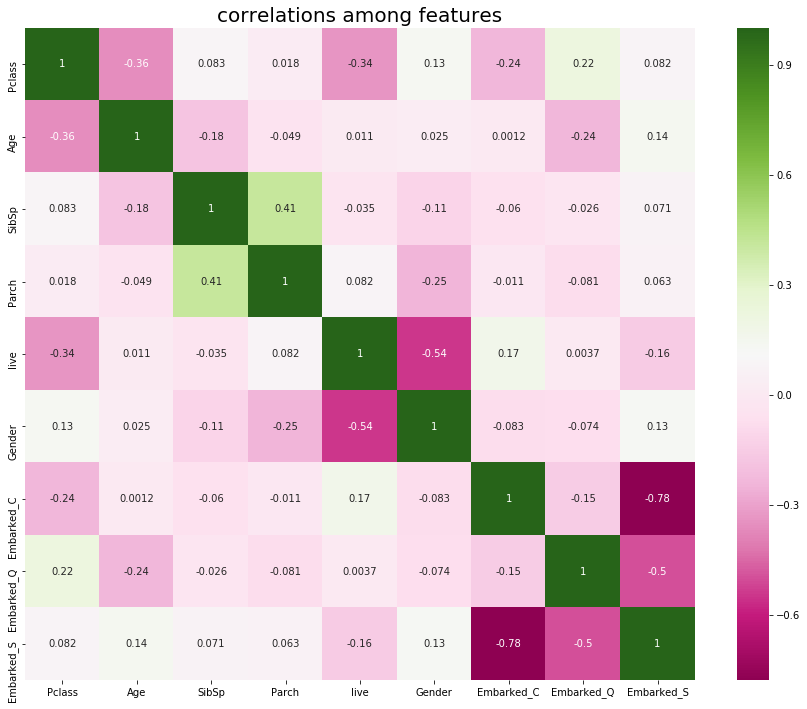

In [81]:
plt.subplots(figsize=(15,12))
sns.heatmap(df.corr(),annot=True, cmap='PiYG')
plt.title('correlations among features',fontsize=20)

In [191]:
## Lets compare the means of gender for passengers who survived and the passengers who didnot survive. 
avg_live = df[df['live']==1]['Gender'].mean()
print ("The average gender for the passengers who survived is: " + str(avg_live))
avg_die = df[df['live']==0]['Gender'].mean()
print ("The average gender for the passengers who not survived is: " + str(avg_die))

The average gender for the passengers who survived is: 0.318713450292
The average gender for the passengers who not survived is: 0.852459016393


In [202]:
import scipy.stats as stats
degree_freedom = len(df[df['live']==1])
#置信区间
LQ = stats.t.ppf(0.025,degree_freedom) # # Left Quartile
RQ = stats.t.ppf(0.975,degree_freedom)  #Right Quartile
print ('The left quartile range of t-distribution is: ' + str(LQ))
print ('The right quartile range of t-distribution is: ' + str(RQ))

The left quartile range of t-distribution is: -1.96692464548
The right quartile range of t-distribution is: 1.96692464548


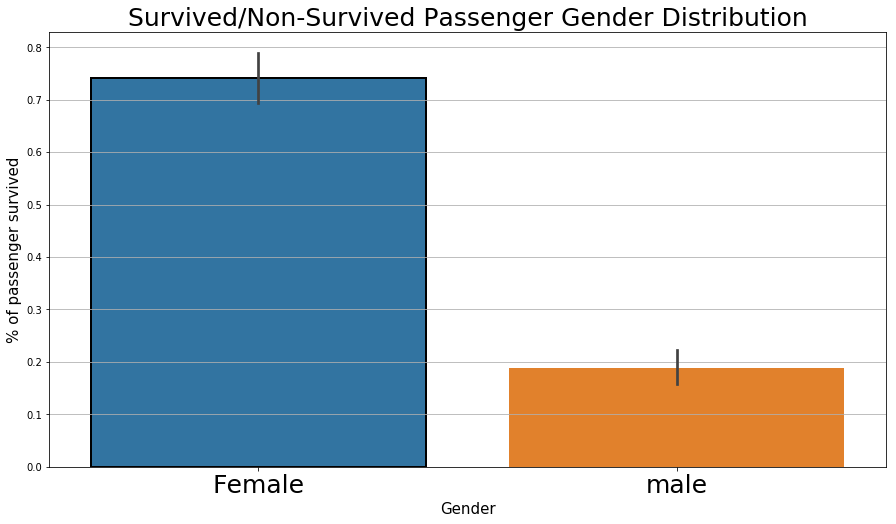

In [217]:
plt.subplots(figsize=(15,8))
sns.barplot(x = 'Gender' , y='live', data=df, edgecolor=(0,0,0), linewidth=2)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Gender",fontsize = 15)

labels = ['Female','male']
plt.xticks(sorted(df.Gender.unique()),labels , fontsize=25)
plt.grid(axis='y')

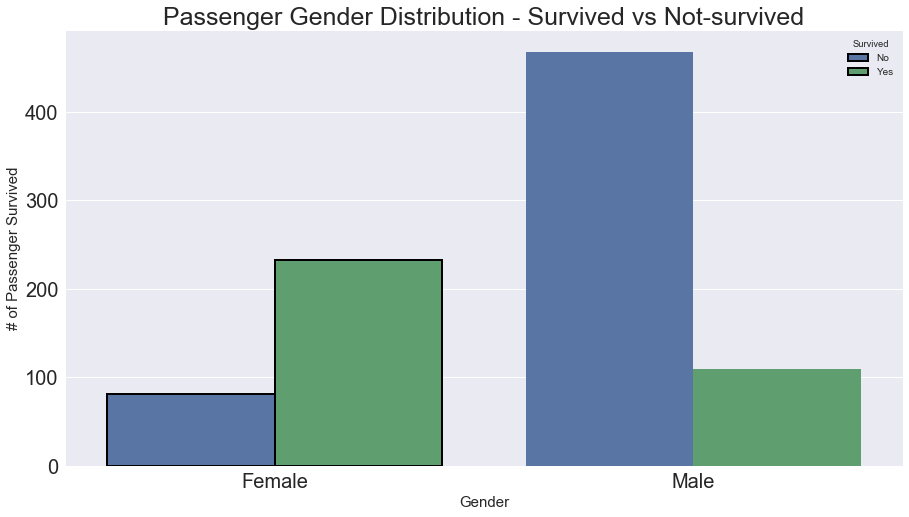

In [242]:
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Gender",hue="live",data = df,edgecolor=(0,0,0),linewidth=2)
## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25)
plt.xlabel("Gender", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
labels = ['Female', 'Male']
plt.xticks(sorted(df.Gender.unique()), labels,fontsize=20)
plt.yticks(fontsize=20)
## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

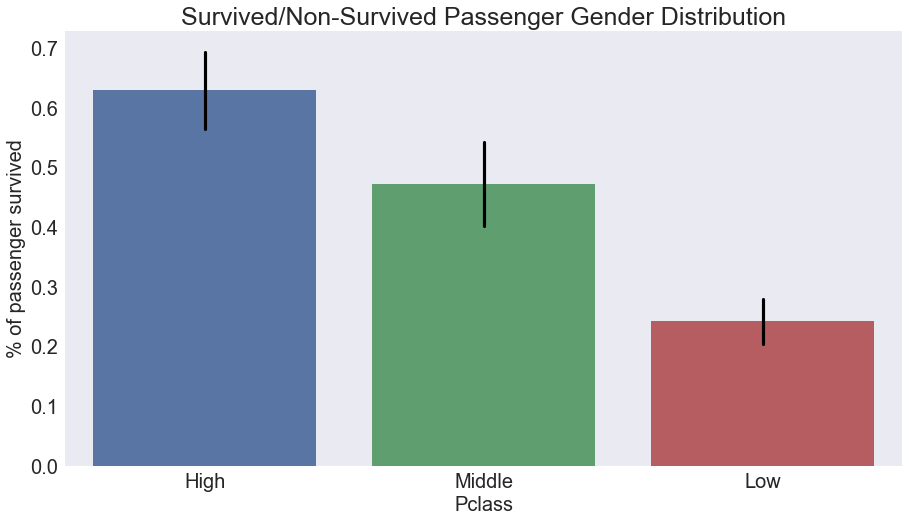

In [247]:
#plt.figure()
plt.subplots(figsize=(15,8))
sns.barplot(x = 'Pclass' , y='live', data=df, errcolor=(0,0,0), linewidth=2)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
plt.ylabel("% of passenger survived", fontsize = 20)
plt.xlabel("Pclass",fontsize = 20)
plt.yticks(fontsize=20)
labels = ['High','Middle','Low']
plt.xticks(sorted(df.Pclass.unique()-1),labels, fontsize=20)
plt.grid(axis='y')

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 <a list of 8 Text yticklabel objects>)

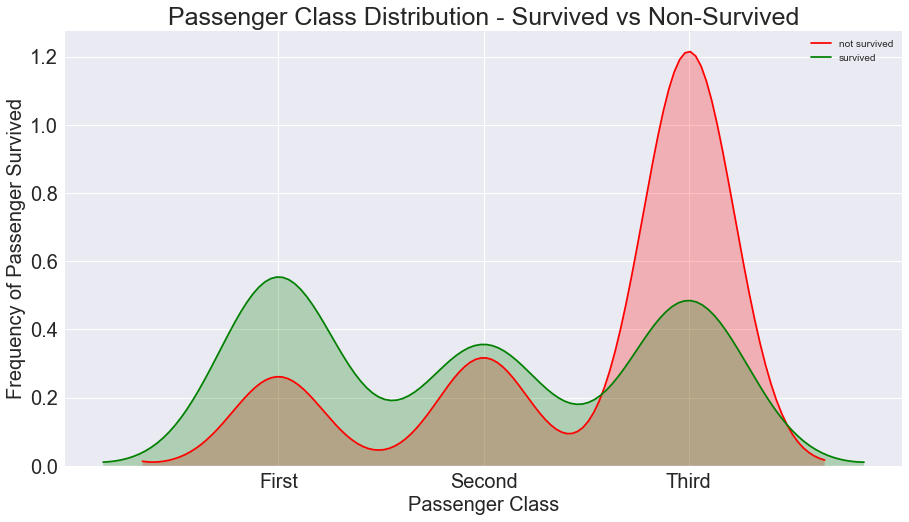

In [252]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8))
ax=sns.kdeplot(df.loc[(df['live'] == 0),'Pclass'] , color='r',shade=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['live'] == 1),'Pclass'] , color='g',shade=True, label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 20)
plt.xlabel("Passenger Class", fontsize = 20)

## Converting xticks into words for better understanding
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df.Pclass.unique()), labels, fontsize=20)
plt.yticks(fontsize=20)

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8]),
 <a list of 10 Text yticklabel objects>)

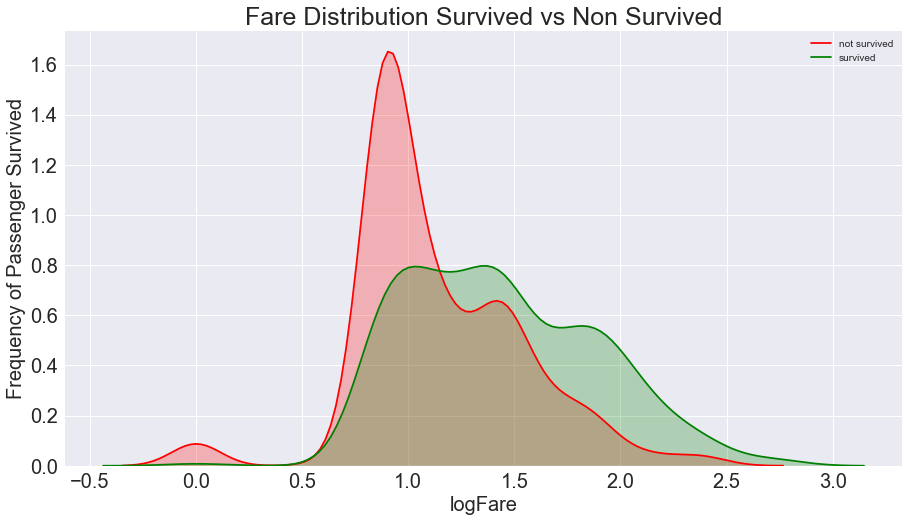

In [255]:
#fare and live
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['live'] == 0),'logFare'] , color='r',shade=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['live'] == 1),'logFare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 20)
plt.xlabel("logFare", fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

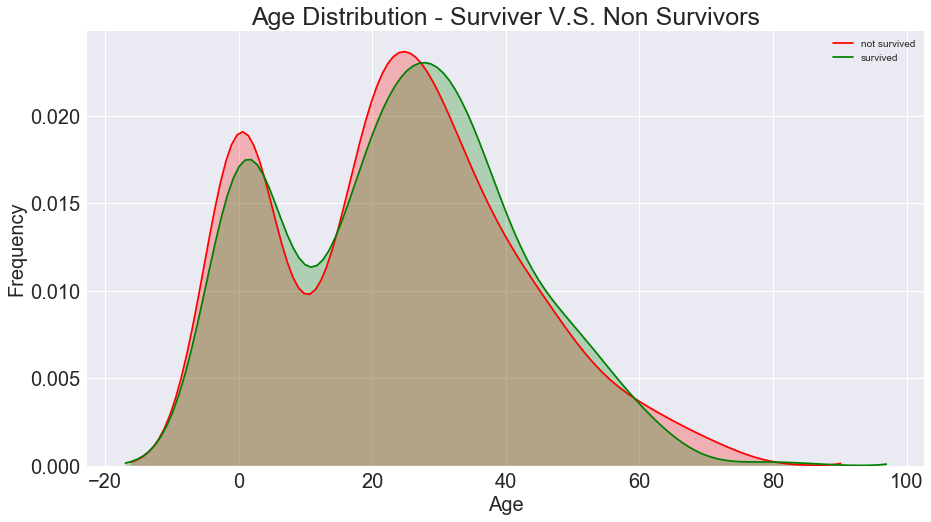

In [257]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['live'] == 0),'Age'] , color='r',shade=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['live'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors',fontsize=25)
plt.xlabel("Age", fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

In [258]:
df.shape

(891, 10)

In [261]:
?train_test_split

In [263]:
# Modeling the data
from sklearn.model_selection import train_test_split
x = df.drop(['live'],axis=1)
y = df.live
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .33, random_state = 1)
x_train.tail()

,Pclass,Age,SibSp,Parch,logFare,Gender,Embarked_C,Embarked_Q,Embarked_S
715,3,19.0,0,0,0.883661435,1,0,0,1
767,3,30.5,0,0,0.889301703,0,0,1,0
72,2,21.0,0,0,1.866287339,1,0,0,1
235,3,0.0,0,0,0.877946952,0,0,0,1
37,3,21.0,0,0,0.90579588,1,0,0,1


In [265]:
# Feature Scaling 数据标准化处理
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
## Necessary modules for creating models. 
from sklearn.tree import DesisionTreeClassifier
from sklearn.model_selection import cross_

In [189]:
?str

In [83]:
pred = pd.read_csv('F:/python/TensorFlow_study/Trade_experiment/result/predict_lstm_seq2_seq2_embedding_close_20_20180110.csv')
real = pd.read_csv('F:/python/TensorFlow_study/Trade_experiment/result/real_lstm_seq2_seq2_embedding_close_20_20180110.csv')


In [87]:
pred.iloc[:,1:3].head(2),pred.iloc[:,1:3].tail(2)

(   predict  real
 0       45    41
 1       42    39,       predict  real
 2978       39    43
 2979       41    43)

Text(206.34,0.5,'pred label')

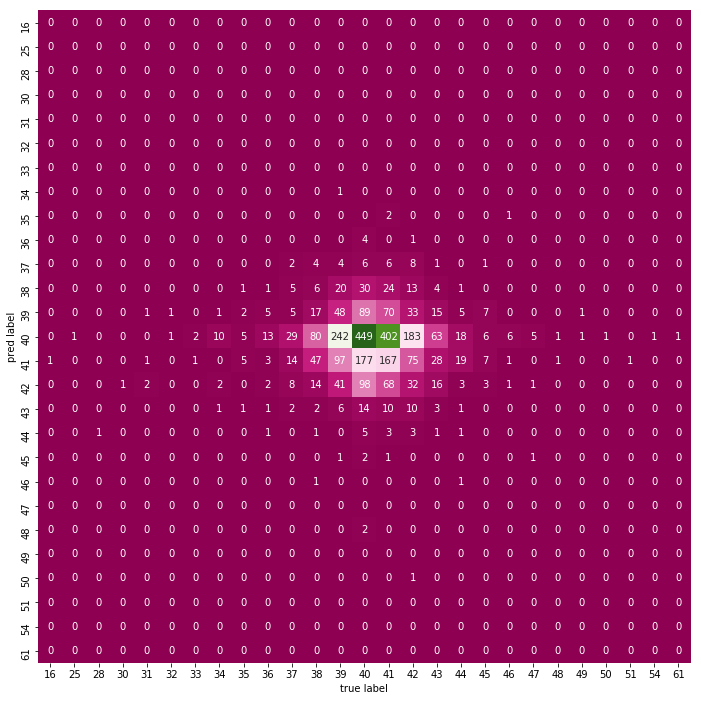

In [187]:
from sklearn.metrics import confusion_matrix
plt.subplots(figsize=(15,12))
mat = confusion_matrix(predict.predict, predict.real)
sns.heatmap(mat,square=True, annot=True,cmap='PiYG', fmt='d', cbar=False,
           xticklabels=set(pred.real),
           yticklabels=set(pred.real))
plt.xlabel('true label')
plt.ylabel('pred label')

In [176]:
?plt.xticklabels

Object `plt.xticklabels` not found.


In [180]:
set(pred.predict),set(pred.real)

({34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 50},
 {16,
  25,
  28,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  54,
  61})